In [34]:
%matplotlib inline
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
plt.style.use('ggplot')

# Code4Lib 2017 Workshop Part 2

## Merging Data

In many real world situations, the data we'd like to analyze comes in multiple files. Pandas provides multiple different ways of merging data, including "merge()", and "concat()". To get started, we first need to load each of our datasets into a DataFrame. We'll use the same surveys data as in the last part of the workshop, as well as another dataset called "species.csv", which augments the data available for each species code.

In [2]:
# load the csvs into DataFrames
survey_dataframe = pd.read_csv("data/surveys.csv")
survey2_dataframe = pd.read_csv("data/surveys2.csv")

# print out the dimensions of each DataFrame
print("""
Survey1: %s
Survey2: %s
""" % (survey_dataframe.shape, survey2_dataframe.shape))


Survey1: (35549, 9)
Survey2: (99, 9)



### Concatenation

First, we'll look at concatenating two DataFrames. We've imported the original survey data from the last part of the workshop, as well as another file "surveys2.csv", which contains additional records with the same structure as "surveys.csv". Often, data is separated over multiple files for many reasons including logical separation (time-based, etc), or due to size constraints, so it is useful to know how to concatenate multiple sets of data.

Pandas provides the "pd.concat()" method, which accepts a sequence (example: tuple, list, dict) of Series or DataFrame objects to concatenate together. We'll pass a list containing the survey_dataframe and the survey2_dataframe to create a new DataFrame "big_survey_dataframe":

In [3]:
big_survey_dataframe = pd.concat([survey_dataframe, survey2_dataframe])
big_survey_dataframe

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


### Merge

Merging in Pandas is when you combine two different DataFrames that share an identifier into a single DataFrame. This can be compared to the idea of joins in SQL. When you have two different DataFrames containing a shared identifier (think foreign key), you can use the "pd.merge()" function to merge them into a single DataFrame.

We'll first load another dataset from "species.csv", containing information which expands on the species_id in our survey dataset.

In [4]:
species_dataframe = pd.read_csv("data/species.csv")
species_dataframe.head()

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


http://pandas.pydata.org/pandas-docs/stable/merging.html



inner join merge -- smaller subset of data

In [5]:
merged_survey_dataframe = pd.merge(left=big_survey_dataframe, right=species_dataframe, left_on='species_id', right_on='species_id')
merged_survey_dataframe

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent
5,106,8,20,1977,12,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
6,107,8,20,1977,18,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
7,121,8,21,1977,15,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
8,171,9,11,1977,12,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
9,194,9,12,1977,11,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent


left join merge --- smaller subset of data

In [6]:
left_merged_survey = pd.merge(left=big_survey_dataframe,
                              right=species_dataframe,
                              how='left',
                              left_on='species_id',
                              right_on='species_id')
left_merged_survey

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,Perognathus,flavus,Rodent
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,Perognathus,flavus,Rodent


## Cleaning Data

* removing duplicate entries
http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.drop_duplicates.html

In [7]:
no_duplicates_survey = left_merged_survey.drop_duplicates()
no_duplicates_survey

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,Perognathus,flavus,Rodent
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,Perognathus,flavus,Rodent


* remove NaN entries
http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.dropna.html

In [8]:
no_nan_survey = no_duplicates_survey.dropna()
no_nan_survey

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
62,63,8,19,1977,3,DM,M,35.0,40.0,Dipodomys,merriami,Rodent
63,64,8,19,1977,7,DM,M,37.0,48.0,Dipodomys,merriami,Rodent
64,65,8,19,1977,4,DM,F,34.0,29.0,Dipodomys,merriami,Rodent
65,66,8,19,1977,4,DM,F,35.0,46.0,Dipodomys,merriami,Rodent
66,67,8,19,1977,7,DM,M,35.0,36.0,Dipodomys,merriami,Rodent
67,68,8,19,1977,8,DO,F,32.0,52.0,Dipodomys,ordii,Rodent
68,69,8,19,1977,2,PF,M,15.0,8.0,Perognathus,flavus,Rodent
69,70,8,19,1977,3,OX,F,21.0,22.0,Onychomys,sp.,Rodent
70,71,8,19,1977,7,DM,F,36.0,35.0,Dipodomys,merriami,Rodent
73,74,8,19,1977,8,PF,M,12.0,7.0,Perognathus,flavus,Rodent


* run function over each row to clean a string (or something else)
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
apply() to run over rows/columns

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html
applymap() to run over all elements

## Sorting Data

* order data by weight (asc/desc)
* group by sex
* group by species

In [9]:
sort_asc = no_nan_survey.sort_values(['sex','species','weight','hindfoot_length'])
sort_asc

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
14550,14551,6,11,1988,21,NL,F,32.0,32.0,Neotoma,albigula,Rodent
5965,5966,5,22,1982,2,NL,F,32.0,40.0,Neotoma,albigula,Rodent
7648,7649,4,16,1983,17,NL,F,28.0,44.0,Neotoma,albigula,Rodent
9359,9360,7,4,1984,15,NL,F,28.0,50.0,Neotoma,albigula,Rodent
4394,4395,5,3,1981,18,NL,F,32.0,56.0,Neotoma,albigula,Rodent
16108,16109,6,3,1989,12,NL,F,29.0,57.0,Neotoma,albigula,Rodent
14383,14384,4,18,1988,8,NL,F,30.0,60.0,Neotoma,albigula,Rodent
12702,12703,4,26,1987,1,NL,F,30.0,63.0,Neotoma,albigula,Rodent
25790,25791,5,10,1997,12,NL,F,30.0,63.0,Neotoma,albigula,Rodent
25765,25766,5,10,1997,12,NL,F,30.0,64.0,Neotoma,albigula,Rodent


In [10]:
sort_desc = no_nan_survey.sort_values(['weight','hindfoot_length'], ascending = False)
sort_desc

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
33048,33049,11,17,2001,12,NL,M,33.0,280.0,Neotoma,albigula,Rodent
12870,12871,5,28,1987,2,NL,M,32.0,278.0,Neotoma,albigula,Rodent
15458,15459,1,11,1989,9,NL,M,36.0,275.0,Neotoma,albigula,Rodent
2132,2133,10,25,1979,2,NL,F,33.0,274.0,Neotoma,albigula,Rodent
12728,12729,4,26,1987,2,NL,M,32.0,270.0,Neotoma,albigula,Rodent
30174,30175,1,8,2000,2,NL,M,34.0,265.0,Neotoma,albigula,Rodent
12601,12602,4,6,1987,2,NL,M,34.0,260.0,Neotoma,albigula,Rodent
13024,13025,7,1,1987,2,NL,M,33.0,260.0,Neotoma,albigula,Rodent
8868,8869,2,5,1984,15,NL,M,33.0,259.0,Neotoma,albigula,Rodent
12457,12458,3,2,1987,2,NL,M,33.0,259.0,Neotoma,albigula,Rodent


In [11]:
group_by_sex = sort_asc.groupby('sex')
group_by_sex
group_by_sex.size()

sex
F    14584
M    16092
dtype: int64

## Transforming Data

* convert m/d/y into datetime
* convert weight to different unit, demonstrating writing a function to transform data

In [12]:
# fails because dates are incorrect
"""datetimes = pd.to_datetime(
    { 'year': no_nan_survey.year,
      'month': no_nan_survey.month,
      'day': no_nan_survey.day
    })
    """

"datetimes = pd.to_datetime(\n    { 'year': no_nan_survey.year,\n      'month': no_nan_survey.month,\n      'day': no_nan_survey.day\n    })\n    "

In [13]:
# coerce to ignore incorrect dates
datetimes = pd.to_datetime(
    { 'year': no_nan_survey.year,
      'month': no_nan_survey.month,
      'day': no_nan_survey.day
    },
    errors='coerce')

dates_survey = no_nan_survey.assign(date = datetimes)
dates_survey

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
62,63,8,19,1977,3,DM,M,35.0,40.0,Dipodomys,merriami,Rodent,1977-08-19
63,64,8,19,1977,7,DM,M,37.0,48.0,Dipodomys,merriami,Rodent,1977-08-19
64,65,8,19,1977,4,DM,F,34.0,29.0,Dipodomys,merriami,Rodent,1977-08-19
65,66,8,19,1977,4,DM,F,35.0,46.0,Dipodomys,merriami,Rodent,1977-08-19
66,67,8,19,1977,7,DM,M,35.0,36.0,Dipodomys,merriami,Rodent,1977-08-19
67,68,8,19,1977,8,DO,F,32.0,52.0,Dipodomys,ordii,Rodent,1977-08-19
68,69,8,19,1977,2,PF,M,15.0,8.0,Perognathus,flavus,Rodent,1977-08-19
69,70,8,19,1977,3,OX,F,21.0,22.0,Onychomys,sp.,Rodent,1977-08-19
70,71,8,19,1977,7,DM,F,36.0,35.0,Dipodomys,merriami,Rodent,1977-08-19
73,74,8,19,1977,8,PF,M,12.0,7.0,Perognathus,flavus,Rodent,1977-08-19


In [14]:
# see which dates were incorrect
dates_survey[(pd.isnull(dates_survey['date']))]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
30649,30650,4,31,2000,6,PP,F,22.0,19.0,Chaetodipus,penicillatus,Rodent,NaT
30650,30651,4,31,2000,6,PB,M,25.0,32.0,Chaetodipus,baileyi,Rodent,NaT
30651,30652,4,31,2000,6,PB,F,25.0,30.0,Chaetodipus,baileyi,Rodent,NaT
30652,30653,4,31,2000,6,PP,M,23.0,20.0,Chaetodipus,penicillatus,Rodent,NaT
30653,30654,4,31,2000,6,PP,M,23.0,24.0,Chaetodipus,penicillatus,Rodent,NaT
30654,30655,4,31,2000,6,OT,M,20.0,33.0,Onychomys,torridus,Rodent,NaT
30655,30656,4,31,2000,6,PP,F,24.0,17.0,Chaetodipus,penicillatus,Rodent,NaT
30656,30657,4,31,2000,6,PB,M,24.0,29.0,Chaetodipus,baileyi,Rodent,NaT
30657,30658,4,31,2000,6,PB,F,25.0,36.0,Chaetodipus,baileyi,Rodent,NaT
30658,30659,4,31,2000,9,OT,F,20.0,24.0,Onychomys,torridus,Rodent,NaT


## Statistics

* datetime stats
* any other advanced stats

In [15]:
dates_survey[(dates_survey['date'] > '1987-01-01') & (dates_survey['date'] < '1987-12-31')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
12169,12170,1,31,1987,16,RM,F,15.0,11.0,Reithrodontomys,megalotis,Rodent,1987-01-31
12170,12171,1,31,1987,24,DM,M,35.0,45.0,Dipodomys,merriami,Rodent,1987-01-31
12172,12173,1,31,1987,20,OL,M,19.0,38.0,Onychomys,leucogaster,Rodent,1987-01-31
12173,12174,1,31,1987,14,DM,M,35.0,49.0,Dipodomys,merriami,Rodent,1987-01-31
12174,12175,1,31,1987,18,PE,F,20.0,25.0,Peromyscus,eremicus,Rodent,1987-01-31
12175,12176,1,31,1987,24,RM,M,16.0,11.0,Reithrodontomys,megalotis,Rodent,1987-01-31
12176,12177,1,31,1987,14,DM,F,34.0,41.0,Dipodomys,merriami,Rodent,1987-01-31
12177,12178,1,31,1987,16,RM,F,15.0,7.0,Reithrodontomys,megalotis,Rodent,1987-01-31
12178,12179,1,31,1987,14,OL,M,20.0,32.0,Onychomys,leucogaster,Rodent,1987-01-31
12179,12180,1,31,1987,24,DM,F,34.0,38.0,Dipodomys,merriami,Rodent,1987-01-31


## Visualization

### Histograms

histogram of weight distribution grouped by species

species
albigula        Axes(0.125,0.125;0.775x0.755)
baileyi         Axes(0.125,0.125;0.775x0.755)
eremicus        Axes(0.125,0.125;0.775x0.755)
flavus          Axes(0.125,0.125;0.775x0.755)
fulvescens      Axes(0.125,0.125;0.775x0.755)
fulviventer     Axes(0.125,0.125;0.775x0.755)
hispidus        Axes(0.125,0.125;0.775x0.755)
intermedius     Axes(0.125,0.125;0.775x0.755)
leucogaster     Axes(0.125,0.125;0.775x0.755)
leucopus        Axes(0.125,0.125;0.775x0.755)
maniculatus     Axes(0.125,0.125;0.775x0.755)
megalotis       Axes(0.125,0.125;0.775x0.755)
merriami        Axes(0.125,0.125;0.775x0.755)
montanus        Axes(0.125,0.125;0.775x0.755)
ochrognathus    Axes(0.125,0.125;0.775x0.755)
ordii           Axes(0.125,0.125;0.775x0.755)
penicillatus    Axes(0.125,0.125;0.775x0.755)
sp.             Axes(0.125,0.125;0.775x0.755)
spectabilis     Axes(0.125,0.125;0.775x0.755)
taylori         Axes(0.125,0.125;0.775x0.755)
torridus        Axes(0.125,0.125;0.775x0.755)
Name: weight, dtype: objec

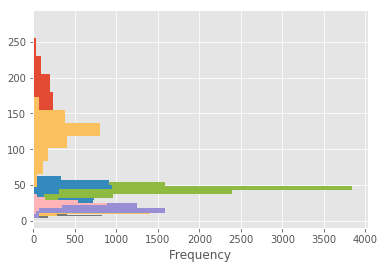

In [16]:
dates_survey.groupby('species')['weight'].plot.hist(orientation='horizontal')

### Box Plots
http://www.datavizcatalogue.com/methods/box_plot.html

box plot of distribution of hindfoot length by species

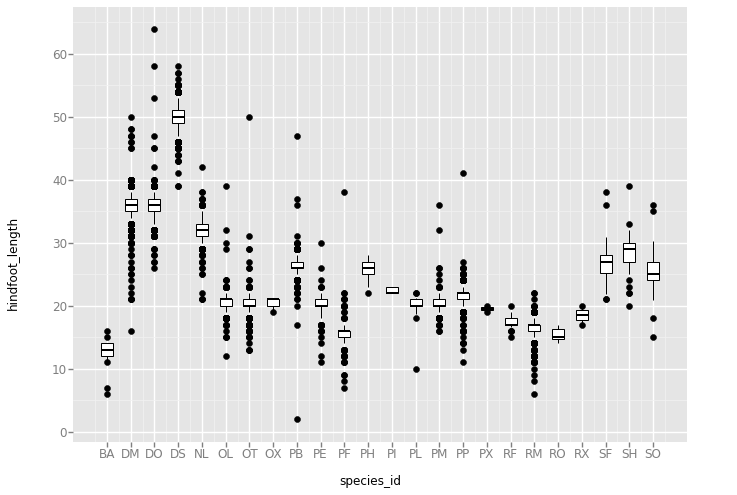

<ggplot: (280906546)>

In [17]:
ggplot( aes(x = 'species_id', y = 'hindfoot_length'), data = dates_survey) + geom_boxplot()

* bar

In [18]:
#dates_survey.plot.bar('weight')

* scatterplot

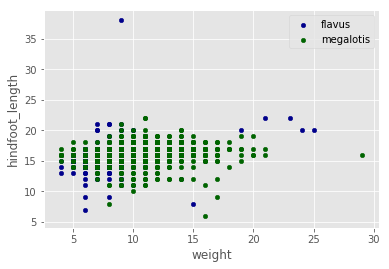

In [19]:
ax = dates_survey[(dates_survey['species'] == 'flavus')].plot.scatter(x='weight', y='hindfoot_length', color='DarkBlue', label='flavus')
dates_survey[(dates_survey['species'] == 'megalotis')].plot.scatter(x='weight', y='hindfoot_length', color='DarkGreen', label='megalotis', ax=ax)

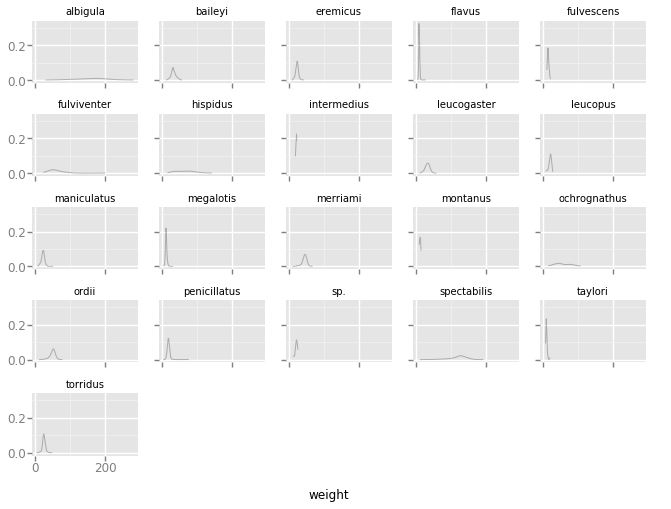

<ggplot: (281934186)>

In [20]:
ggplot(dates_survey, aes(x='weight', fill='hindfoot_length')) +\
    geom_density(alpha=0.25) +\
    facet_wrap("species")

* applying to subset of data / comparison between different subsets
http://ggplot.yhathq.com/docs/facet_grid.html

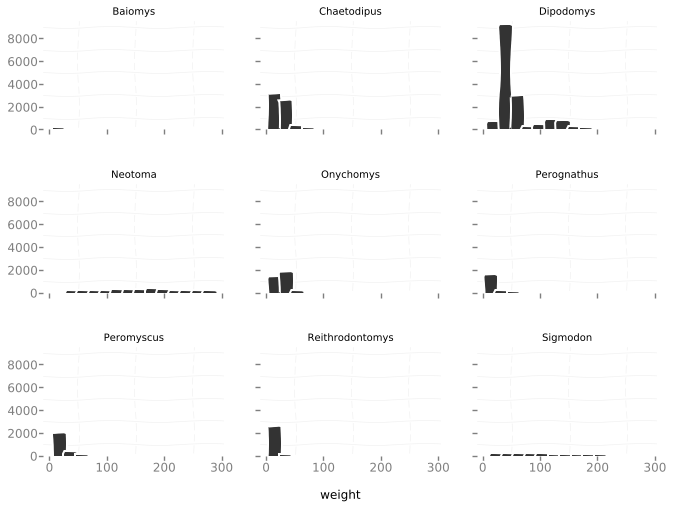

<ggplot: (289181623)>

In [35]:
ggplot(aes(x='weight'), data=dates_survey) + \
    geom_histogram(binwidth=20) + \
    facet_wrap("genus") + \
    theme_bw()

In [27]:
dates_survey['genus'].unique().size

9